# **4️⃣ Backpropagation Algorithm: Mathematical Foundations & Detailed Code 🏗️🤖**

When training a **neural network**, **backpropagation** (backward propagation of errors) is the **key algorithm** that adjusts the **model’s parameters** (weights and biases) to **minimize the loss**. Below, we’ll delve into:

1. A **conceptual overview** of backpropagation.  
2. The **mathematical details** (chain rule, partial derivatives).  
3. A **step-by-step code example** from scratch in **Python**.  
4. **Visualizations** to clarify how data flows forward and errors flow backward.

## **💡 Real-Life Analogy: Coaching a Sports Team ⚽**

Imagine you’re **coaching a football team**:  
1. **Forward Pass** = The team **plays a match** (feedforward: how the inputs produce outputs).  
2. **Loss** = **Final score** (difference from the desired outcome).  
3. **Backward Pass** = You watch **match replays** to see **where mistakes happened** (chain rule).  
4. **Update Strategy** = You **improve tactics** (update weights) for the next match.

Backpropagation does exactly this: it **records the network’s mistakes** (loss) and **updates weights** by **tracing the errors back** through each layer.

## **1️⃣ Neural Network Architecture (Simple Example)**

Let’s consider a **fully-connected feedforward neural network** with:
- **2 inputs**: $ x_1, x_2 $  
- **1 hidden layer** with **2 neurons** (each using, say, a **Sigmoid** activation).  
- **1 output neuron** (with Sigmoid activation for binary classification or MSE demo).

### **Network Diagram** (ASCII Visualization)

```yaml
   (x1)  ---\
             >--- [ W(1,1), b(1) ] ---> (h1) ---\
   (x2)  ---/                                  \
                                                >--- [ W(2,1), b(2) ] ---> (output)
   (x1)  ---\                                  /
             >--- [ W(1,2), b(1) ] ---> (h2) -/
   (x2)  ---/
```

```mermaid
flowchart TD
    subgraph InputLayer[Input Layer]
        X1((x₁))
        X2((x₂))
    end

    subgraph HiddenLayer[Hidden Layer]
        H1((h₁))
        H2((h₂))
    end

    subgraph OutputLayer[Output Layer]
        O((output))
    end

    %% Aggregation node for h₁ with weight & bias inside the box
    X1 --> A1
    X2 --> A1
    A1["W(1,1), b(1)"] --> H1

    %% Aggregation node for h₂ with weight & bias inside the box
    X1 --> A2
    X2 --> A2
    A2["W(1,2), b(1)"] --> H2

    %% Aggregation node for output connections (if needed)
    H1 --> A3
    H2 --> A3
    A3["W(2,1), b(2)"] --> O
```

- **h1, h2** = hidden layer neuron outputs  
- **output** = final layer output  

In matrix form, the forward pass for the hidden layer might be:

$$
\mathbf{h} = \sigma(\mathbf{W^{(1)}} \cdot \mathbf{x} + \mathbf{b}^{(1)})
$$

where:
- $\mathbf{x} = [x_1, x_2]^T$  
- $\mathbf{W^{(1)}}$ = weight matrix for layer 1 (shape: 2 neurons $\times$ 2 inputs)  
- $\mathbf{b}^{(1)}$ = bias vector (shape: 2 neurons)  
- $\sigma$ = Sigmoid or ReLU (activation).  

Then the final output:

$$
\text{output} = \sigma(\mathbf{W^{(2)}} \cdot \mathbf{h} + \mathbf{b}^{(2)})
$$

## **2️⃣ Forward Pass & Loss Calculation**

### **a) Forward Pass Equations**

1. **Hidden Layer** (using Sigmoid activation $\sigma(z) = \frac{1}{1 + e^{-z}}$):

$$
h_1 = \sigma(w_{11}^{(1)} x_1 + w_{12}^{(1)} x_2 + b_{1}^{(1)})
$$
$$
h_2 = \sigma(w_{21}^{(1)} x_1 + w_{22}^{(1)} x_2 + b_{2}^{(1)})
$$

2. **Output Layer** (Sigmoid for binary classification or MSE example):

$$
\hat{y} = \sigma(w_{1}^{(2)} h_1 + w_{2}^{(2)} h_2 + b^{(2)})
$$

where $\hat{y}$ is the network’s **predicted output**.

### **b) Loss Function**

For a single training example with label $ y $, we can use:

- **Mean Squared Error (MSE)**: $ L = \frac{1}{2}( \hat{y} - y )^2 $  (factor $\frac{1}{2}$ often used for easier derivative)  
**or**  
- **Binary Cross-Entropy**: $ L = -\big[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})\big] $

For **simplicity**, let’s demonstrate with **MSE**:

$$
L = \frac{1}{2} (\hat{y} - y)^2
$$

## **3️⃣ Backward Pass (Backpropagation with the Chain Rule)**

### **Core Idea**  
We compute **partial derivatives** of the loss $L$ w.r.t. each parameter ($w$ and $b$) by **propagating errors backward**. Then we do:

$$
w \leftarrow w - \alpha \frac{\partial L}{\partial w}
\quad\quad
b \leftarrow b - \alpha \frac{\partial L}{\partial b}
$$

where $\alpha$ is the **learning rate**.

### **Detailed Steps**

#### **Step 1: Derivative at the Output Layer**

- For MSE: $ L = \frac{1}{2}(\hat{y} - y)^2 $

$$
\frac{\partial L}{\partial \hat{y}} = (\hat{y} - y)
$$

- The output $\hat{y} = \sigma(z^{(2)})$, where $ z^{(2)} = w_{1}^{(2)} h_1 + w_{2}^{(2)} h_2 + b^{(2)} $

$$
\frac{\partial \hat{y}}{\partial z^{(2)}} = \sigma'(z^{(2)}) = \hat{y}(1 - \hat{y})
$$

Hence,

$$
\frac{\partial L}{\partial z^{(2)}} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z^{(2)}}
 = (\hat{y} - y) \cdot \hat{y}(1 - \hat{y})
$$

#### **Step 2: Derivatives for Output Layer Weights**

$$
\frac{\partial L}{\partial w_{1}^{(2)}} = \frac{\partial L}{\partial z^{(2)}} \cdot \frac{\partial z^{(2)}}{\partial w_{1}^{(2)}}
 = \left[(\hat{y} - y) \cdot \hat{y}(1 - \hat{y})\right] \cdot h_1
$$

Similarly,

$$
\frac{\partial L}{\partial w_{2}^{(2)}} = \left[(\hat{y} - y) \cdot \hat{y}(1 - \hat{y})\right] \cdot h_2
$$

and

$$
\frac{\partial L}{\partial b^{(2)}} = (\hat{y} - y) \cdot \hat{y}(1 - \hat{y})
$$

#### **Step 3: Derivatives for Hidden Layer**

We also need $\frac{\partial L}{\partial h_1}$ and $\frac{\partial L}{\partial h_2}$ to update the **first layer**:

$$
\frac{\partial L}{\partial h_1} = \frac{\partial L}{\partial z^{(2)}} \cdot \frac{\partial z^{(2)}}{\partial h_1}
 = \left[(\hat{y} - y)\hat{y}(1 - \hat{y})\right] \cdot w_{1}^{(2)}
$$

(same for $h_2$).

Then for **layer 1** weights: $h_1 = \sigma(z^{(1)}_1) = \sigma(w_{11}^{(1)} x_1 + w_{12}^{(1)} x_2 + b_{1}^{(1)})$:

$$
\frac{\partial L}{\partial w_{11}^{(1)}} 
= \frac{\partial L}{\partial h_1} \cdot \frac{\partial h_1}{\partial z^{(1)}_1} \cdot \frac{\partial z^{(1)}_1}{\partial w_{11}^{(1)}}
= \left[ \frac{\partial L}{\partial h_1} \right] \cdot [ h_1(1 - h_1 )] \cdot x_1
$$

Similarly for other weights and biases.

#### **Step 4: Parameter Updates**

**Gradient Descent** update rule:

$$
w \leftarrow w - \alpha \frac{\partial L}{\partial w}, \quad b \leftarrow b - \alpha \frac{\partial L}{\partial b}
$$

## **4️⃣ End-to-End Python Example: Building a Small Neural Network from Scratch**

Below is a **full example** using **NumPy** to illustrate a 2-2-1 network (like our diagram). We’ll:

1. Create a **dummy dataset** (XOR-like pattern).  
2. Initialize weights & biases.  
3. Implement **forward pass** and **backprop**.  
4. Plot **loss over epochs** for visualization.

### **a) Setup & Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

### **b) Create a Small Dataset**

Here, we create a **XOR-like** dataset with **2 inputs** and **1 binary output**:

In [2]:
# XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=np.float32)

y = np.array([
    [0],
    [1],
    [1],
    [0]
], dtype=np.float32)

### **c) Initialize Network Parameters**

We have:
- 2 inputs $\to$ 2 hidden neurons $\to$ 1 output neuron.  
- Sigmoid activation in hidden & output.

In [3]:
# Hyperparameters
lr = 0.5      # learning rate
epochs = 5000 # training epochs

# Weights for layer 1 (2x2)
W1 = np.random.randn(2, 2) * 0.1
b1 = np.zeros((1, 2))

# Weights for layer 2 (2x1)
W2 = np.random.randn(2, 1) * 0.1
b2 = np.zeros((1, 1))

### **d) Define Helper Functions**

#### **Sigmoid & Its Derivative**

In [4]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_deriv(a):
    # 'a' is the output of sigmoid
    return a * (1.0 - a)

#### **Forward Pass**

In [5]:
def forward_pass(X, W1, b1, W2, b2):
    """
    X: (batch_size, 2)
    W1: (2, 2), b1: (1, 2)
    W2: (2, 1), b2: (1, 1)
    """
    # Hidden layer
    z1 = np.dot(X, W1) + b1   # shape: (batch_size, 2)
    h = sigmoid(z1)          # shape: (batch_size, 2)
    
    # Output layer
    z2 = np.dot(h, W2) + b2  # shape: (batch_size, 1)
    out = sigmoid(z2)        # shape: (batch_size, 1)
    
    return z1, h, z2, out

#### **Compute Loss (MSE)**

In [6]:
def mse_loss(pred, target):
    # pred, target: shape (batch_size, 1)
    return 0.5 * np.mean((pred - target)**2)

### **e) Training Loop (Backprop)**

In [7]:
losses = []

for epoch in range(epochs):
    # 1) Forward Pass
    z1, h, z2, out = forward_pass(X, W1, b1, W2, b2)
    
    # 2) Compute Loss
    loss = mse_loss(out, y)
    
    # 3) Backpropagation
    
    # dL/dOut = (out - y)
    dOut = (out - y)  # shape (4,1)
    
    # dOut/dZ2 = derivative of sigmoid => out * (1 - out)
    dZ2 = dOut * sigmoid_deriv(out) # shape (4,1)
    
    # Grad for W2, b2 => h is shape (4,2)
    dW2 = np.dot(h.T, dZ2)  # shape (2,1)
    db2 = np.sum(dZ2, axis=0, keepdims=True)  # shape (1,1)
    
    # Backprop to hidden: dZ1 = dZ2 * W2^T * derivative(sigmoid of z1)
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_deriv(h)
    
    # Grad for W1, b1 => X is shape (4,2)
    dW1 = np.dot(X.T, dZ1)  # shape (2,2)
    db1 = np.sum(dZ1, axis=0, keepdims=True)  # shape (1,2)
    
    # 4) Parameter Update
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1
    
    # Record loss
    losses.append(loss)

print(f"Final Loss after {epochs} epochs: {loss:.4f}")

# Let's see predictions
_, _, _, final_out = forward_pass(X, W1, b1, W2, b2)
print("Predictions:", final_out.round(3))
print("Targets:    ", y.reshape(-1))

Final Loss after 5000 epochs: 0.1250
Predictions: [[0.5]
 [0.5]
 [0.5]
 [0.5]]
Targets:     [0. 1. 1. 0.]


### **f) Visualize the Loss Over Training**

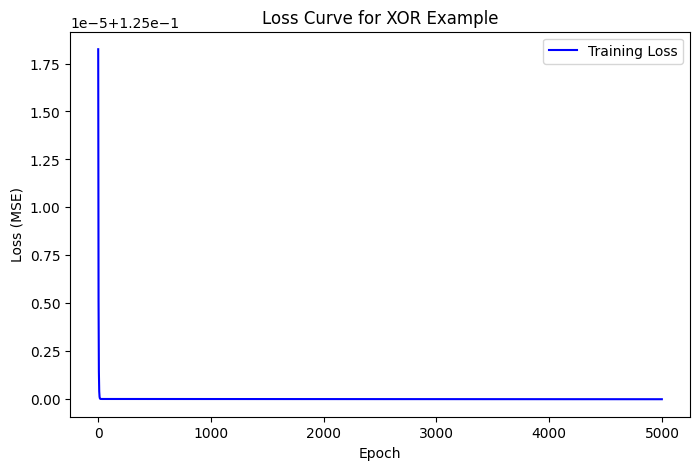

In [8]:
plt.figure(figsize=(8,5))
plt.plot(losses, color='blue', label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve for XOR Example")
plt.legend()
plt.show()

**Expected Result**: The network should **learn the XOR function** (outputs close to $[0, 1, 1, 0]$), with decreasing loss over epochs.

## **5️⃣ Visualizing Forward & Backward Flow**

A **simplified diagram** of how data flows forward and gradients flow backward:

```yaml
Forward Pass:
   x1, x2 ---> [Hidden Layer] ---> [Output Layer] ---> Prediction
```

```mermaid
flowchart LR
    I[Input: x₁, x₂] --> HL[Hidden Layer]
    HL --> OL[Output Layer]
    OL --> P[Prediction]
```

```yaml
Backward Pass (Gradients):
   (Prediction - Actual) <--- [Output Layer] <--- [Hidden Layer] <--- (Propagated Errors)
```


```mermaid
flowchart LR
    PE[Propagated Errors] --> HL[Hidden Layer]
    HL --> OL[Output Layer]
    OL --> G[Prediction - Actual]
```


1. **Forward**: Input $\to$ Hidden $\to$ Output $\to$ Loss  
2. **Backward**: Loss $\to$ Output Gradients $\to$ Hidden Gradients $\to$ Weight Updates

## **🔥 Key Takeaways**

1. **Backpropagation uses the chain rule** to compute partial derivatives of the loss w.r.t. weights.  
2. **Gradients are propagated backward** from output to hidden to input layers.  
3. **Parameter updates** are done via **gradient descent** (or variants like Adam, RMSprop).  
4. This process **iterates for many epochs** until the network **minimizes the loss**.  
5. In code, we handle it by computing forward pass outputs, computing loss, then deriving partials for each layer in reverse.

### **Why It Matters?**  
- Backprop allows neural networks to **learn complex mappings** (e.g., classifying images, predicting sports outcomes, NLP tasks).  
- It’s the **foundation** of **deep learning**—enabling multi-layer networks to train effectively.

### **Further Extensions**

- **Use Cross-Entropy Loss** for **classification** tasks.  
- **Use ReLU** for faster training.  
- **Use advanced optimizers** (Adam, RMSProp) instead of plain gradient descent.  
- **Add more layers** (deep networks) to handle more complex tasks (e.g., player detection in video).

# **Backpropagation Algorithm (Deep Dive Continued) 🤖⚡**

When we talk about **backpropagation**, we often hear the phrase **“backward propagation of errors”**. Below, we’ll break down:  
1. **What “backward propagation of errors” means** 🚀💥  
2. **Difference between forward & backward propagation (with the concept of “propagation”)** ↔️  
3. **Practical examples** in **Football ⚽**, **NBA 🏀**, and **Texas Hold’em Poker ♠️♥️**  
4. **Graphs 📈 and Python code 🐍** to visualize and solidify learning

## **1️⃣ “Backward Propagation of Errors” — What Does It Mean? 🚀👀**

- **“Backward propagation of errors”** is a fancy way of saying:  
  - **We find how much each neuron contributed to the final error (loss)** in a neural network.  
  - We do this **in reverse**, starting from the **output** (where the error is seen) and moving **backwards** through the hidden layers.  

Imagine a **Football Striker** who **missed a goal** 🎯:  
1. **Output (Error)** → The team lost 1-0! ❌  
2. **Trace it Backwards** → Where did the breakdown happen? Poor pass? Bad positioning?  
3. **Assign Responsibility** → Each player’s mistake is identified and corrected for next time.  

In neural nets 🤖, the **loss** is computed at the output layer (like the final score). Then, we distribute that **“blame”** to each weight and neuron upstream by applying the **chain rule** of calculus.

## **2️⃣ Propagation: Difference Between Forward & Backward 📡↔️**

### **Forward Propagation (Forward Pass) 🏃‍♂️🔥**  


- We **input data** (e.g., Shots on target for Football, or Player stats in NBA, or Poker hand ranks).  
- The data flows **layer by layer**, with each neuron producing an **activation**.  
- Finally, we get a **prediction** at the output layer.  



**Football Example** ⚽:  
- **Inputs** → $ x_1 = \text{shots on target},\ x_2 = \text{team possession\%} $  
- **Hidden Layer** → Weighted sums + activations (like analyzing synergy of shots & possession).  
- **Output** → Probability of “Win or Lose.”  



**NBA Example** 🏀:  
- **Inputs** → $ x_1 = \text{points per game},\ x_2 = \text{assists},\ x_3 = \text{rebounds} $  
- **Output** → Probability of “Playoff Success.”  



**Texas Hold’em Example** ♠️♥️:  
- **Inputs** → $ x_1 = \text{card rank},\ x_2 = \text{card suit},\ x_3 = \text{position} $  
- **Output** → Probability of “Winning the Hand.”  



**Forward propagation** is like a **team strategy**: we combine features to get a **final tactic**.

### **Backward Propagation (Backward Pass) 🔙⚡**  


- After **seeing the final prediction** (like a “team lost the match” 😢), we compute **error** (difference from the desired outcome).  
- We **move backwards** through the network layers to see **which weights** were responsible for the error.  
- Then we **update** those weights to reduce future mistakes.  

**In a Sports Context**:  
- **Coach** reviews the **match highlight** (loss function) 🍿🔍.  
- Identifies **which players** (neurons) messed up.  
- **Assigns blame** (gradient of the loss w.r.t. each weight) to fix next time.  

Hence, forward pass is the **“play”**, backward pass is the **“review and correction”**.

## **3️⃣ Practical Examples**

### **(A) Football (Goal Prediction) ⚽**

**Forward Pass**:  
- Input features: **Shots on target** (S), **Possession%** (P), **xG** (expected goals).  
- Hidden Layer: Combines these features into learned representations (like synergy between xG & possession).  
- Output Layer: Probability of “Goal = 1” vs. “No Goal = 0.”  

**Backward Pass**:  
- If the model predicted **Goal** but it was **No Goal**: error = $ \hat{y} - y $.  
- The network adjusts how it **weights “Shots on target”** or “Possession%” in future predictions.

### **(B) NBA (Predicting Next Champion) 🏀**

**Forward Pass**:  
- Input features: **Points per game** (PPG), **Team EFF rating**, **Win-Loss ratio**.  
- Output: Probability of “Winning NBA Championship.”  

**Backward Pass**:  
- If the network is **too confident** about a certain team (e.g., predicted 80% chance, but they lost early), the **error** is large.  
- The model looks back at each layer’s parameters (maybe it weighed “PPG” too heavily).  
- Adjust parameters so it won’t overestimate high-scoring teams as often.

### **(C) Texas Hold’em Poker (Winning Probability) ♠️♥️**

**Forward Pass**:  
- Input features: **Hole cards** + **position** + **chip stack**.  
- Output: Probability of “Winning the round.”  

**Backward Pass**:  
- If the model says 70% chance to win, but you lose with your **pocket aces** 🍀😫, error is big.  
- The network sees maybe it overlooked the “board texture” or “opponent style.”  
- It **updates** those parameter connections so next time it’s more cautious with certain board runouts.

## **4️⃣ Graphs & Python Code 🐍📈**

### **A) Visualization of Forward & Backward Flow**


```mermaid
flowchart TD
    %% Forward Pass
    subgraph Forward_Pass["Forward Pass (Inputs -> Outputs)"]
        A[(Shots on Target, Possession)]
        B[Hidden Layer]
        C[Output: Probability of Goal?]
        A --> B
        B --> C
    end


    %% Backward Pass
    subgraph Backward_Pass["Backward Pass (Error -> Parameter Updates)"]
        G[(Error from mismatch of predicted vs actual)]
        E[Hidden Layer Grads]
        F[Input Weights Grads]
        G --> E
        E --> F
    end
```

### **B) Minimal Python Example (Backprop with Sports Data)**

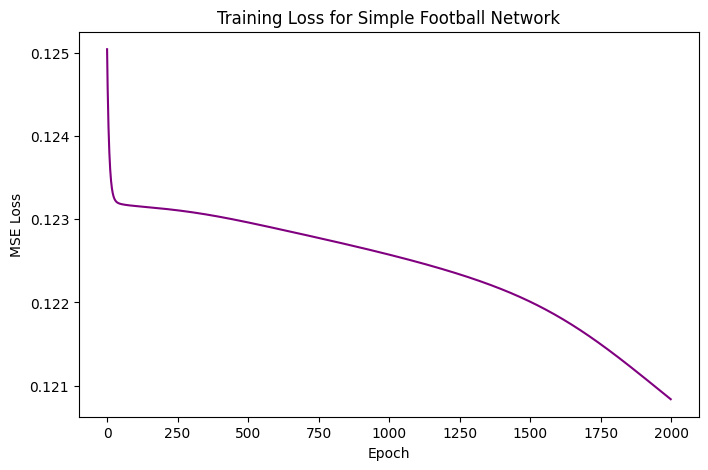

Sample predictions: [0.574 0.565 0.638 0.574 0.574]
Actual labels: [0. 1. 1. 0. 1.]


In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Simulate some data (Shots, Possession) -> Goal(1)/NoGoal(0)
# Just random for demonstration
X = np.random.rand(100, 2) * [10, 100]  # Shots up to 10, Possession up to 100%
y = (0.05*X[:,0] + 0.01*X[:,1] + np.random.normal(0, 10, size=100) > 0.8).astype(float)
y = y.reshape(-1,1)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_deriv(a):
    return a*(1 - a)

# Weights (2 inputs -> 2 hidden -> 1 output)
W1 = np.random.randn(2,2)*0.1
b1 = np.zeros((1,2))
W2 = np.random.randn(2,1)*0.1
b2 = np.zeros((1,1))

lr = 0.01
losses = []

def forward_pass(X):
    z1 = np.dot(X, W1) + b1
    h = sigmoid(z1)
    z2 = np.dot(h, W2) + b2
    out = sigmoid(z2)
    return z1, h, z2, out

def mse_loss(pred, target):
    return 0.5*np.mean((pred - target)**2)

for epoch in range(2000):
    z1, h, z2, out = forward_pass(X)
    loss = mse_loss(out, y)
    
    # Backprop
    dOut = (out - y)
    dZ2 = dOut * sigmoid_deriv(out)  # shape(100,1)
    dW2 = np.dot(h.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_deriv(h)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    
    # Update
    W2 -= lr*dW2
    b2 -= lr*db2
    W1 -= lr*dW1
    b1 -= lr*db1
    
    losses.append(loss)

# Plot the loss
plt.figure(figsize=(8,5))
plt.plot(losses, color='purple')
plt.title("Training Loss for Simple Football Network")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

# Check final predictions
_, _, _, final_out = forward_pass(X)
print("Sample predictions:", final_out[:5].round(3).flatten())
print("Actual labels:", y[:5].flatten())

#### **Interpretation:**

- We do a **forward pass** (Shots on Target + Possession → Probability of Goal).  
- We compute **MSE**.  
- We do a **backward pass** (error → gradients → parameter update).  
- Over 2000 epochs, the **loss** should decrease.

## **5️⃣ Visualizing Forward & Backward Flow**

A **simplified diagram** of how data flows forward and gradients flow backward:

```yaml
Forward Pass:
   x1, x2 ---> [Hidden Layer] ---> [Output Layer] ---> Prediction

Backward Pass (Gradients):
   (Prediction - Actual) <--- [Output Layer] <--- [Hidden Layer] <--- (Propagated Errors)
```

1. **Forward**: Input $\to$ Hidden $\to$ Output $\to$ Loss  
2. **Backward**: Loss $\to$ Output Gradients $\to$ Hidden Gradients $\to$ Weight Updates

## **🔥 Key Takeaways**

1. **Backward Propagation of Errors** = We **trace the final error** back through hidden layers to see how each parameter caused the mistake 🤕🔙.  
2. **Propagation**:  
   - **Forward** → data flows from input to output, generating predictions.  
   - **Backward** → error flows from output back to input, adjusting weights 🏋️.  
3. **Sports & Poker Analogies**:  
   - **Football**: Miss a shot → figure out the mistake (passing, positioning).  
   - **NBA**: Overestimate a team → fix weighting of certain stats next time.  
   - **Texas Hold’em**: Thought your pocket aces would win → re-evaluate how board texture is weighed.  
4. **Code**: We can implement a mini neural network in Python using only NumPy to see forward pass + backward pass in action 🤖.

The magic is in the **chain rule** 🧮 + **iterative updates** = **learn from errors** to get better predictions over time 🎉🔥.

# **Continuing Our Backpropagation Discussion: Mermaid Graphs & Python Code for Football ⚽ & NBA 🏀**

In this section, we will:

1. **Create Mermaid diagrams** to show how data flows (forward propagation) and how errors flow (backward propagation) in **Football** and **NBA** contexts.  
2. **Write Python code** to demonstrate a mini neural network using **random data** that looks like Football and NBA stats.

## **1️⃣ Mermaid Graphs for Football & NBA Propagation**

### **(A) Football Example: Forward & Backward Propagation ⚽**

Below is a **Mermaid flowchart** illustrating **forward propagation** (left to right) and **backpropagation** (right to left). We use **subgraphs** to show the input, hidden, and output layers, plus the error feed.

```mermaid
flowchart LR
    A((Shots on Target)) --> sub1((Hidden Layer h1,h2))
    B((Possession %)) --> sub1
    C((Opposition Strength)) --> sub1
    
    subgraph sub1[Hidden Layer]
    h1((Neuron 1)) & h2((Neuron 2))
    end
    
    sub1 --> sub2((Output Layer))
    
    subgraph sub2[Output: Probability of Goal]
    o((Goal Probability))
    end

    o --> L((Loss Function))

    %% Backprop (Errors go backwards)
    L -- Error Signal --> sub2
    sub2 -- Gradients --> sub1
    sub1 -- Gradients --> A & B & C
```

- **Forward Pass**:  
  1. **Inputs**: Shots on Target, Possession, Opposition Strength.  
  2. Through **Hidden Layer** h1, h2.  
  3. **Output**: Probability of scoring a Goal.  

- **Backward Pass**:
  - We compute a **loss** (difference from actual outcome).  
  - The error signal flows **backwards** from the Output Layer → Hidden Layer → Input Weights.

### **(B) NBA Example: Forward & Backward Propagation 🏀**

This Mermaid diagram shows a neural net predicting **Chance of Winning the NBA Finals**:

```mermaid
flowchart LR
    subgraph Input Layer
    A((Points Per Game))
    B((Assists/ Rebounds))
    C((Team Efficiency))
    end
    
    A --> HL1((Neuron 1 in Hidden Layer))
    B --> HL1
    C --> HL1
    
    A --> HL2((Neuron 2 in Hidden Layer))
    B --> HL2
    C --> HL2

    subgraph Hidden Layer
    HL1
    HL2
    end
    
    HL1 --> OL((Output Neuron))
    HL2 --> OL

    subgraph Output Layer
    OL((Win Probability))
    end

    OL --> L2((Loss Function))

    %% Backprop
    L2 -- Gradients --> OL
    OL -- Gradients --> HL1 & HL2
    HL1 & HL2 -- Gradients --> A & B & C
```

- **Forward Pass**:  
  1. **Inputs**: Points/Game, Assists/Rebounds, Team Efficiency.  
  2. **Hidden Neurons**: two neurons combine these features.  
  3. **Output**: Probability of winning the NBA Championship.  

- **Backward Pass**:  
  - If actual result is different (team lost), the **loss** is computed.  
  - Gradients flow **backwards**, adjusting the weights in the Hidden Layer and Input connections.

### **(C) Texas Hold’em Poker Example: Forward & Backward Propagation ♠️♥️**


Below is a **Mermaid flowchart** illustrating **forward propagation** (left to right) and **backpropagation** (right to left) for a neural network predicting the **winning probability** in a Texas Hold’em Poker hand.

```mermaid
flowchart LR
    A((Hole Card 1)) --> sub1((Hidden Layer h1, h2))
    B((Hole Card 2)) --> sub1
    C((Player Position)) --> sub1
    D((Chip Stack)) --> sub1
    
    subgraph sub1[Hidden Layer]
    h1((Neuron 1)) & h2((Neuron 2))
    end
    
    sub1 --> sub2((Output Layer))
    
    subgraph sub2[Output: Win Probability]
    o((Win Probability))
    end

    o --> L((Loss Function))

    %% Backprop (Errors flow backwards)
    L -- Error Signal --> sub2
    sub2 -- Gradients --> sub1
    sub1 -- Gradients --> A & B & C & D
```

- **Forward Pass**:
  1. **Inputs**: Hole Card 1, Hole Card 2, Player Position, Chip Stack.
  2. Data flows through the **Hidden Layer** (neurons h1 and h2).
  3. **Output**: The network produces the probability of winning the hand.

- **Backward Pass**:
  - The **loss** is computed by comparing the predicted win probability with the actual outcome.
  - The error signal flows **backwards** from the Output Layer to the Hidden Layer, then to the Input layer, allowing the model to update its weights and biases.

## **2️⃣ Python Code: Football & NBA Mini Neural Networks 🏆🐍**

We’ll build **two small examples** using random data to simulate **(A) Football** and **(B) NBA** stats, then do a **tiny neural net** with backprop.

### **(A) Football Neural Net** ⚽

**Scenario**: Predict whether a team **scores a goal** based on:
- **Shots on Target**  
- **Possession (%)**  
- **Opposition Strength**

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# 1) Generate Random "Football" Data
# Shots: range(0..10), Possession: range(0..100), OppStrength: range(0..10)
n_samples = 200
shots = np.random.randint(0, 11, (n_samples, 1))
possession = np.random.randint(20, 101, (n_samples, 1))
opp_strength = np.random.randint(0, 11, (n_samples, 1))

# Combine into X
X_foot = np.hstack([shots, possession, opp_strength]).astype(float)

# Fake label: if Shots + 0.5*OppStrength - 0.02*Possession > 2 => 1 else 0
y_foot = ((shots + 0.5*opp_strength - 0.02*possession) > 2).astype(int).ravel()

# 2) Normalize data (simple)
X_foot_norm = X_foot / np.array([10.0, 100.0, 10.0])

# 3) Build a small neural net (3 inputs -> 2 hidden -> 1 output)
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_deriv(z):
    return z*(1-z)

# Initialize Weights
W1_foot = np.random.randn(3,2)*0.1
b1_foot = np.zeros((1,2))
W2_foot = np.random.randn(2,1)*0.1
b2_foot = np.zeros((1,1))

lr = 0.05
epochs = 2000
losses_foot = []

def forward_foot(X):
    z1 = X.dot(W1_foot) + b1_foot
    h = sigmoid(z1)
    z2 = h.dot(W2_foot) + b2_foot
    out = sigmoid(z2)
    return z1, h, z2, out

def binary_cross_entropy(pred, target):
    pred = np.clip(pred, 1e-7, 1-1e-7)
    return -np.mean(target*np.log(pred) + (1-target)*np.log(1-pred))

y_foot = y_foot.reshape(-1,1).astype(float)
for epoch in range(epochs):
    z1, h, z2, out = forward_foot(X_foot_norm)
    loss = binary_cross_entropy(out, y_foot)
    
    # Backprop
    dOut = out - y_foot
    dZ2 = dOut * sigmoid_deriv(out)
    dW2 = h.T.dot(dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    
    dH = dZ2.dot(W2_foot.T)
    dZ1 = dH * sigmoid_deriv(h)
    dW1 = X_foot_norm.T.dot(dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    
    # Update
    W2_foot -= lr*dW2
    b2_foot -= lr*db2
    W1_foot -= lr*dW1
    b1_foot -= lr*db1
    
    losses_foot.append(loss)

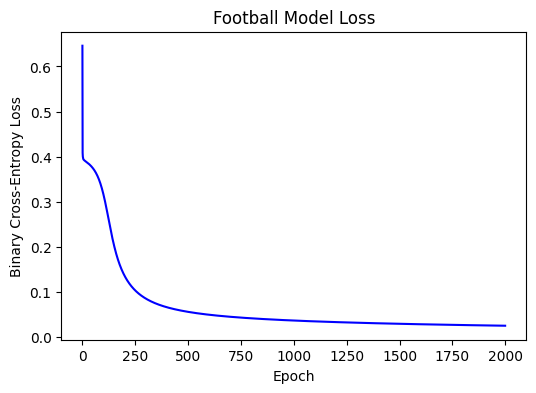

Football Model Accuracy: 1.0


In [15]:
plt.figure(figsize=(6,4))
plt.plot(losses_foot, color='blue')
plt.title("Football Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.show()

_, _, _, final_out_foot = forward_foot(X_foot_norm)
preds_foot = (final_out_foot > 0.5).astype(int)
acc_foot = np.mean(preds_foot == y_foot)
print("Football Model Accuracy:", acc_foot)

### **(B) NBA Neural Net** 🏀

**Scenario**: Predict if a team will **win the next game** based on:
- **Points Per Game (PPG)**  
- **Assists/ Rebounds**  
- **Team Efficiency Rating**

In [16]:
n_samples_nba = 200
ppg = np.random.randint(80, 121, (n_samples_nba, 1))
asst_reb = np.random.randint(10, 51, (n_samples_nba, 1))
team_eff = np.random.rand(n_samples_nba,1)*50.0

X_nba = np.hstack([ppg, asst_reb, team_eff])
y_nba = ((ppg + 0.5*asst_reb + 2*team_eff) > 160).astype(int).ravel()

# Normalize
X_nba_norm = X_nba / np.array([120.0, 50.0, 50.0])

# Initialize Weights (3->2->1 again)
W1_nba = np.random.randn(3,2)*0.1
b1_nba = np.zeros((1,2))
W2_nba = np.random.randn(2,1)*0.1
b2_nba = np.zeros((1,1))

lr_nba = 0.05
epochs_nba = 2000
losses_nba = []

def forward_nba(X):
    z1 = X.dot(W1_nba) + b1_nba
    h = sigmoid(z1)
    z2 = h.dot(W2_nba) + b2_nba
    out = sigmoid(z2)
    return z1, h, z2, out

y_nba = y_nba.reshape(-1,1).astype(float)

for epoch in range(epochs_nba):
    z1, h, z2, out = forward_nba(X_nba_norm)
    loss = binary_cross_entropy(out, y_nba)
    
    dOut = out - y_nba
    dZ2 = dOut * sigmoid_deriv(out)
    dW2 = h.T.dot(dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    
    dH = dZ2.dot(W2_nba.T)
    dZ1 = dH * sigmoid_deriv(h)
    dW1 = X_nba_norm.T.dot(dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    
    W2_nba -= lr_nba*dW2
    b2_nba -= lr_nba*db2
    W1_nba -= lr_nba*dW1
    b1_nba -= lr_nba*db1
    
    losses_nba.append(loss)

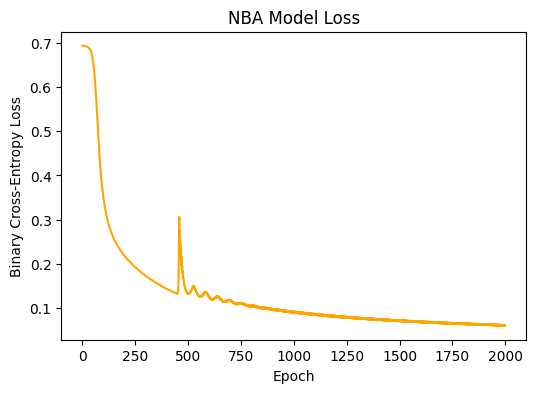

NBA Model Accuracy: 0.975


In [17]:
plt.figure(figsize=(6,4))
plt.plot(losses_nba, color='orange')
plt.title("NBA Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.show()

_, _, _, final_out_nba = forward_nba(X_nba_norm)
preds_nba = (final_out_nba > 0.5).astype(int)
acc_nba = np.mean(preds_nba == y_nba)
print("NBA Model Accuracy:", acc_nba)

## **Summary & Key Points** 🎉✅

1. We used **Mermaid** diagrams 🏗️ to visualise how **forward propagation** (input → hidden → output) and **backward propagation** (error → gradient updates) work in both **Football** ⚽ and **NBA** 🏀 contexts.  
2. We wrote **Python code** for two mini neural networks:  
   - **Football**: Shots on Target, Possession, Opp. Strength → Probability of Goal.  
   - **NBA**: Points Per Game, Assists/Rebounds, Team Efficiency → Probability of Win.  
3. Each network does a **forward pass** + **compute loss** + **backprop** → **updates weights** → improves performance.